In [1]:
from data_loader import CORE50
import copy
import os
import json
from models.vit import MyViT
from utils import *
import configparser
import argparse
from pprint import pprint
from torch.utils.tensorboard import SummaryWriter

preproc = preprocess_imgs

In [2]:
import argparse
import sys
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import cv2
from  matplotlib import pyplot as plt
import os
%matplotlib inline

from vit_rollout import VITAttentionRollout

In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [21]:
def show_mask_on_image(img, mask):
    #img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

In [5]:
model = MyViT(pretrained=True)
#for name, model in model.named_modules():
    #print(name)
model.load_state_dict(torch.load("state_dict_model_6_blocks.pt"))

Resized positional embeddings from torch.Size([1, 577, 768]) to torch.Size([1, 65, 768])
Loaded pretrained weights.


<All keys matched successfully>

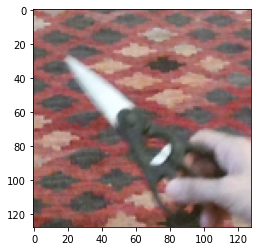

In [15]:
im = cv2.imread("/home/adequino/work/ar1-pytorch/core50/s6/o14/C_06_14_257.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [ ]:
model.eval()
model = maybe_cuda(model, True)
im = np.array(Image.open("/home/adequino/work/ar1-pytorch/core50/s6/o14/C_06_14_257.png"))
im = im[np.newaxis, ...]
#im.shape
im = preproc(im)
input_tensor = torch.from_numpy(im).type(torch.FloatTensor)
input_tensor = maybe_cuda(input_tensor, True)
input_tensor.shape

In [ ]:
print("Doing Attention Rollout")
attention_rollout = VITAttentionRollout(model, head_fusion='max', 
discard_ratio=0.9)
mask = attention_rollout(input_tensor)
name = "attention_rollout_{:.3f}_{}.png".format(0.9, 'max')

In [ ]:
logits = model(input_tensor)
_, pred_label = torch.max(logits.data, 1)
print(pred_label)
#"/home/adequino/work/ar1-pytorch/core50/s6/o14/C_06_14_257.png"
#/home/adequino/work/ar1-pytorch/core50/s3/o1/C_03_01_037.png

In [ ]:
img = Image.open("/home/adequino/work/ar1-pytorch/core50/s6/o14/C_06_14_257.png")
np_img = np.array(img)[:, :, ::-1]
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask) 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()

In [6]:
dataset = CORE50(root='/home/adequino/work/ar1-pytorch/core50', scenario="nicv2_391")
preproc = preprocess_imgs

Loading paths...
Loading LUP...
Loading labels...


In [ ]:
test_paths = dataset.get_test_paths()
test_paths

In [7]:
test_x, test_y = dataset.get_test_set()

In [12]:
i = return_mistake(model, 128, test_x, test_y, preproc=preproc)
if i == None:
    print("That was a mistake.")
else:
    print(i)

test_it:0
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(1, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(0, device='cuda:0')y:tensor(0, device='cuda:0')
pred:tensor(9, device='cuda:0')y:tensor(9, device='cuda:0')
pred:tensor(9, device='cuda:0'

In [ ]:
#print(type(test_x[i]))
#print(test_x[i].shape)
#test_x[i].shape
im = Image.fromarray(np.swapaxes)np.swapaxes(test_x[i],0, 2), 'RGB')
#print(type(im))
#display(im)
plt.imshow(im)
plt.show()

In [ ]:
plt.imshow(test_x[i] / 255)

In [ ]:
model.eval()
model = maybe_cuda(model, True)
im = np.array(Image.open(test_paths[i]))
im = im[np.newaxis, ...]
#im.shape
im = preproc(im)
input_tensor = torch.from_numpy(im).type(torch.FloatTensor)
input_tensor = maybe_cuda(input_tensor, True)
input_tensor.shape

In [ ]:
print("Doing Attention Rollout")
attention_rollout = VITAttentionRollout(model, head_fusion='max', 
discard_ratio=0.9)
mask = attention_rollout(input_tensor)
name = "attention_rollout_{:.3f}_{}.png".format(0.9, 'max')
logits = model(input_tensor)
_, pred_label = torch.max(logits.data, 1)
print(pred_label)

In [ ]:
im = test_x[7]
im = im[np.newaxis, ...]
im = preproc(im)
input_tensor = torch.from_numpy(im).type(torch.FloatTensor)
input_tensor = maybe_cuda(input_tensor, True)
input_tensor.shape
logits = model(input_tensor)
_, pred_label = torch.max(logits.data, 1)
print(pred_label)

In [ ]:
img = Image.open(test_paths[i])
np_img = np.array(img)[:, :, ::-1]
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask) 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()

In [ ]:
np_img = test_x[i]
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask) 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(np_img/255)
plt.show()
plt.imshow(mask)
plt.show()

In [ ]:
test_x = preproc(test_x)

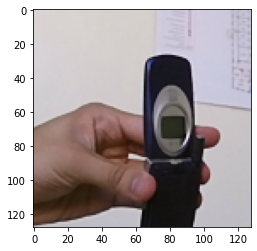

In [26]:
model.eval()
model = maybe_cuda(model, True)
im = test_x[i]
#im = preproc(im)
plt.imshow(im/255)

In [27]:
im_norm = im[np.newaxis, ...]
im_norm = preproc(im_norm)
input_tensor = torch.from_numpy(im_norm).type(torch.FloatTensor)
input_tensor = maybe_cuda(input_tensor, True)
input_tensor.shape
logits = model(input_tensor)
_, pred_label = torch.max(logits.data, 1)
print(pred_label)
print("Real:"+str(test_y[i]))

tensor([20], device='cuda:0')
Real:9.0


Doing Attention Rollout


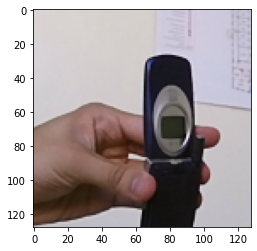

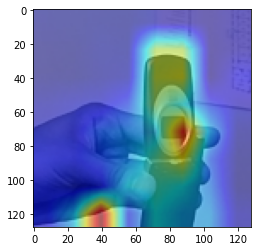

In [28]:
print("Doing Attention Rollout")
attention_rollout = VITAttentionRollout(model, head_fusion='max', 
discard_ratio=0.9)
mask = attention_rollout(input_tensor)
name = "attention_rollout_{:.3f}_{}.png".format(0.9, 'max')
np_img = im/255
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask) 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(np_img)
plt.show()
plt.imshow(mask)
plt.show()

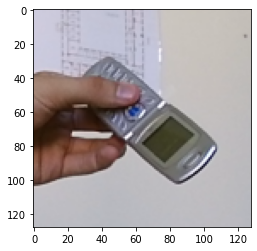

In [23]:
model.eval()
model = maybe_cuda(model, True)
im = test_x[21]
#im = preproc(im)
plt.imshow(im/255)

tensor([9], device='cuda:0')
Real:9.0
Doing Attention Rollout


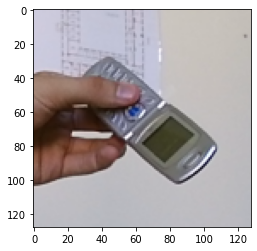

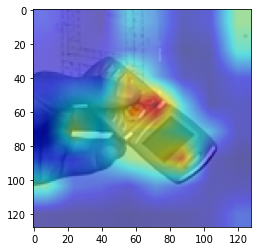

In [25]:
im_norm = im[np.newaxis, ...]
im_norm = preproc(im_norm)
input_tensor = torch.from_numpy(im_norm).type(torch.FloatTensor)
input_tensor = maybe_cuda(input_tensor, True)
input_tensor.shape
logits = model(input_tensor)
_, pred_label = torch.max(logits.data, 1)
print(pred_label)
print("Real:"+str(test_y[21]))
print("Doing Attention Rollout")
attention_rollout = VITAttentionRollout(model, head_fusion='max', 
discard_ratio=0.9)
mask = attention_rollout(input_tensor)
name = "attention_rollout_{:.3f}_{}.png".format(0.9, 'max')
np_img = im/255
mask = cv2.resize(mask, (np_img.shape[1], np_img.shape[0]))
mask = show_mask_on_image(np_img, mask) 
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(np_img)
plt.show()
plt.imshow(mask)
plt.show()